In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
new_df = df.sample(30000)

In [6]:
new_df.shape

(30000, 6)

In [7]:
new_df.duplicated().sum()

np.int64(0)

In [8]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
166670,166670,258558,258559,What are good books on analytics?,What are some good books on analytics?,1
269934,269934,387716,387717,What are the functions of a computer's motherb...,What are some of the uses of a motherboard?,1
102355,102355,169356,169357,What is the best binary options broker?,Which binary option broker is the safest?,0
105855,105855,174468,174469,Goldman Sachs outsourced project to Infosys?,Goldman Sachs outsourced projects to Wipro?,0
99130,99130,57168,164617,What is the difference between write off and l...,What is the difference between a mortgage and ...,0


In [10]:
new_df.duplicated().sum()

np.int64(0)

is_duplicate
0    19096
1    10904
Name: count, dtype: int64
is_duplicate
0    63.653333
1    36.346667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

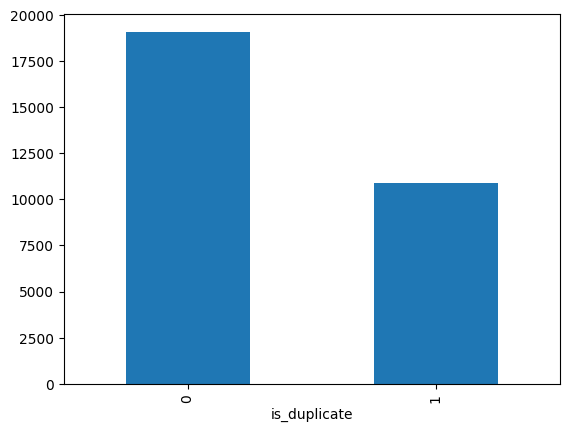

In [11]:
# Distribution of duplicate and non-duplicate questions
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
# Repeated questions
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions : ',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated : ',x[x].shape[0])

Number of unique questions :  55409
Number of questions getting repeated :  3396


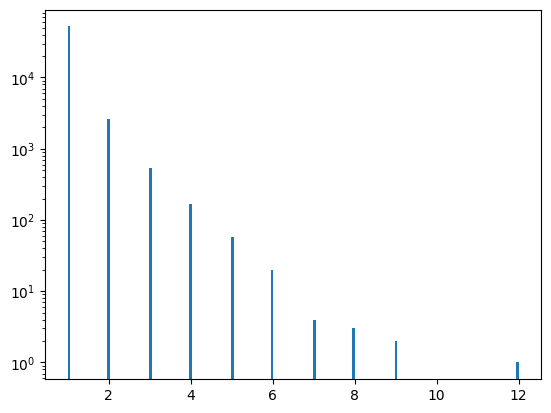

In [13]:
# Repeated questions in histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [14]:
# Feature Engineering
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [15]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
166670,166670,258558,258559,What are good books on analytics?,What are some good books on analytics?,1,33,38
269934,269934,387716,387717,What are the functions of a computer's motherb...,What are some of the uses of a motherboard?,1,51,43
102355,102355,169356,169357,What is the best binary options broker?,Which binary option broker is the safest?,0,39,41
105855,105855,174468,174469,Goldman Sachs outsourced project to Infosys?,Goldman Sachs outsourced projects to Wipro?,0,44,43
99130,99130,57168,164617,What is the difference between write off and l...,What is the difference between a mortgage and ...,0,57,58


In [16]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [17]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
166670,166670,258558,258559,What are good books on analytics?,What are some good books on analytics?,1,33,38,6,7
269934,269934,387716,387717,What are the functions of a computer's motherb...,What are some of the uses of a motherboard?,1,51,43,8,9
102355,102355,169356,169357,What is the best binary options broker?,Which binary option broker is the safest?,0,39,41,7,7
105855,105855,174468,174469,Goldman Sachs outsourced project to Infosys?,Goldman Sachs outsourced projects to Wipro?,0,44,43,6,6
99130,99130,57168,164617,What is the difference between write off and l...,What is the difference between a mortgage and ...,0,57,58,10,11


In [18]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [19]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
166670,166670,258558,258559,What are good books on analytics?,What are some good books on analytics?,1,33,38,6,7,6
269934,269934,387716,387717,What are the functions of a computer's motherb...,What are some of the uses of a motherboard?,1,51,43,8,9,6
102355,102355,169356,169357,What is the best binary options broker?,Which binary option broker is the safest?,0,39,41,7,7,3
105855,105855,174468,174469,Goldman Sachs outsourced project to Infosys?,Goldman Sachs outsourced projects to Wipro?,0,44,43,6,6,4
99130,99130,57168,164617,What is the difference between write off and l...,What is the difference between a mortgage and ...,0,57,58,10,11,6


In [20]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1) + len(w2)

In [21]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
166670,166670,258558,258559,What are good books on analytics?,What are some good books on analytics?,1,33,38,6,7,6,13
269934,269934,387716,387717,What are the functions of a computer's motherb...,What are some of the uses of a motherboard?,1,51,43,8,9,6,16
102355,102355,169356,169357,What is the best binary options broker?,Which binary option broker is the safest?,0,39,41,7,7,3,14
105855,105855,174468,174469,Goldman Sachs outsourced project to Infosys?,Goldman Sachs outsourced projects to Wipro?,0,44,43,6,6,4,12
99130,99130,57168,164617,What is the difference between write off and l...,What is the difference between a mortgage and ...,0,57,58,10,11,6,20


In [22]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
166670,166670,258558,258559,What are good books on analytics?,What are some good books on analytics?,1,33,38,6,7,6,13,0.46
269934,269934,387716,387717,What are the functions of a computer's motherb...,What are some of the uses of a motherboard?,1,51,43,8,9,6,16,0.38
102355,102355,169356,169357,What is the best binary options broker?,Which binary option broker is the safest?,0,39,41,7,7,3,14,0.21
105855,105855,174468,174469,Goldman Sachs outsourced project to Infosys?,Goldman Sachs outsourced projects to Wipro?,0,44,43,6,6,4,12,0.33
99130,99130,57168,164617,What is the difference between write off and l...,What is the difference between a mortgage and ...,0,57,58,10,11,6,20,0.30


Minimum characters :  4
Maximum_characters :  313
Average num of characters :  59


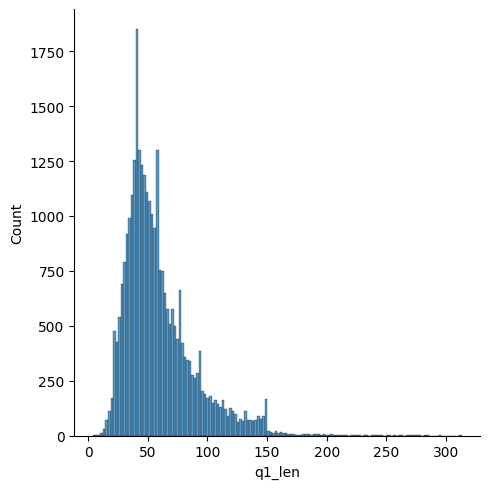

In [23]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('Minimum characters : ',new_df['q1_len'].min())
print('Maximum_characters : ',new_df['q1_len'].max())
print('Average num of characters : ',int(new_df['q1_len'].mean()))

Minimum characters :  10
Maximum_characters :  1169
Average num of characters :  60


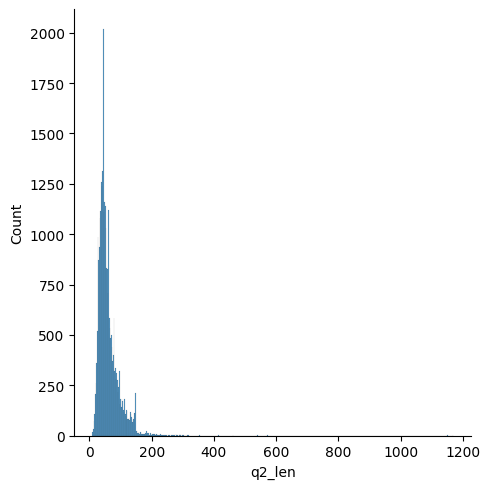

In [24]:
sns.displot(new_df['q2_len'])
print('Minimum characters : ',new_df['q2_len'].min())
print('Maximum_characters : ',new_df['q2_len'].max())
print('Average num of characters : ',int(new_df['q2_len'].mean()))

Minimum characters :  1
Maximum_characters :  64
Average num of characters :  10


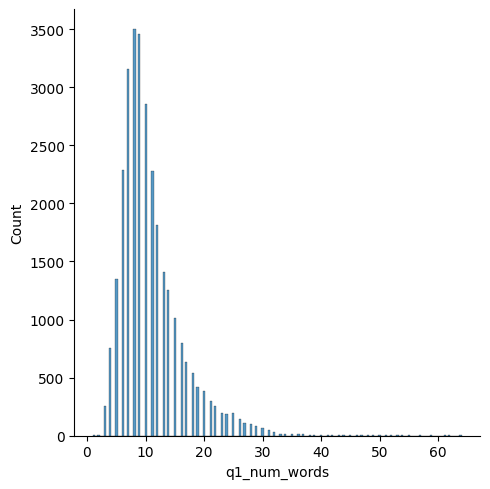

In [25]:
sns.displot(new_df['q1_num_words'])
print('Minimum characters : ',new_df['q1_num_words'].min())
print('Maximum_characters : ',new_df['q1_num_words'].max())
print('Average num of characters : ',int(new_df['q1_num_words'].mean()))

Minimum characters :  2
Maximum_characters :  237
Average num of characters :  11


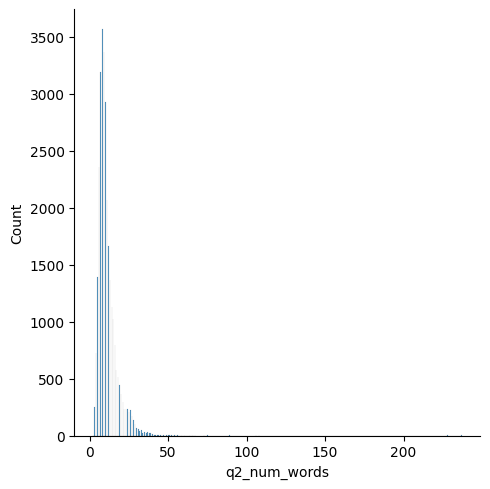

In [26]:
sns.displot(new_df['q2_num_words'])
print('Minimum characters : ',new_df['q2_num_words'].min())
print('Maximum_characters : ',new_df['q2_num_words'].max())
print('Average num of characters : ',int(new_df['q2_num_words'].mean()))

/tmp/ipykernel_1101/3964151908.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non_duplicate')
/tmp/ipykernel_1101/3964151908.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label

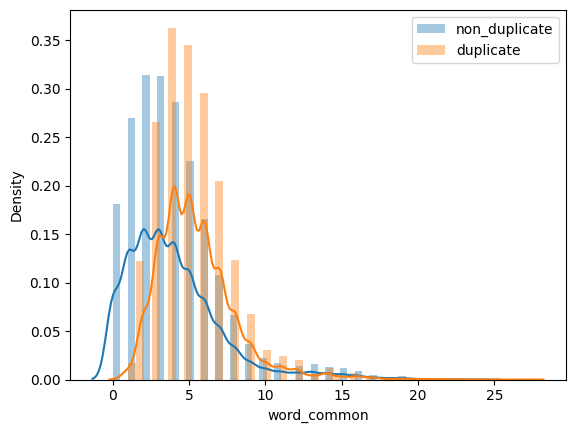

In [27]:
# Common_Words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

/tmp/ipykernel_1101/2214895170.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
/tmp/ipykernel_1101/2214895170.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='

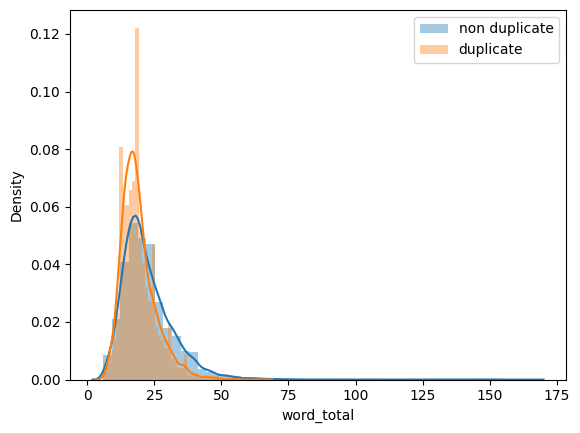

In [28]:
# total_words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

/tmp/ipykernel_1101/1088047278.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non_duplicate')
/tmp/ipykernel_1101/1088047278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='

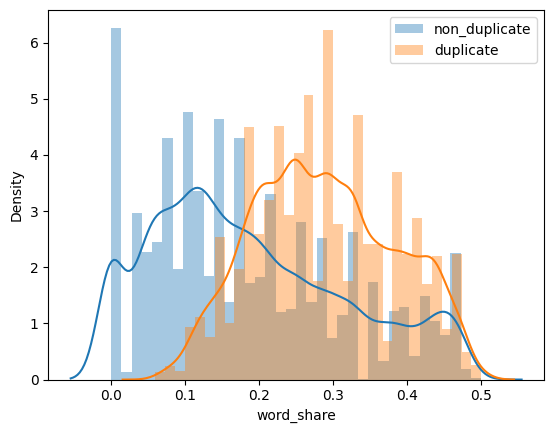

In [29]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [30]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
166670,What are good books on analytics?,What are some good books on analytics?
269934,What are the functions of a computer's motherb...,What are some of the uses of a motherboard?
102355,What is the best binary options broker?,Which binary option broker is the safest?
105855,Goldman Sachs outsourced project to Infosys?,Goldman Sachs outsourced projects to Wipro?
99130,What is the difference between write off and l...,What is the difference between a mortgage and ...


In [31]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
166670,1,33,38,6,7,6,13,0.46
269934,1,51,43,8,9,6,16,0.38
102355,0,39,41,7,7,3,14,0.21
105855,0,44,43,6,6,4,12,0.33
99130,0,57,58,10,11,6,20,0.30


In [32]:
# Apply BOW
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [33]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [34]:
final_df = pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
166670,1,33,38,6,7,6,13,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
269934,1,51,43,8,9,6,16,0.38,0,0,...,0,0,0,0,0,0,0,0,0,0
102355,0,39,41,7,7,3,14,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
105855,0,44,43,6,6,4,12,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
99130,0,57,58,10,11,6,20,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,1:].values,temp_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9978333333333333

In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.998

## Advanced Features
### 1. Token Features
##### cwc_min: This is the ratio of the number of common words to the length of the smaller question
##### cwc_max: This is the ratio of the number of common words to the length of the larger question
##### csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
##### csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
##### ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
##### ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
##### last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
##### first_word_eq: 1 if the first word in the two questions is same, 0 otherwise
### 2. Length Based Features
##### mean_len: Mean of the length of the two questions (number of words)
##### abs_len_diff: Absolute difference between the length of the two questions (number of words)
##### longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
### 3. Fuzzy Features
##### fuzz_ratio: fuzz_ratio score from fuzzywuzzy
##### fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
##### token_sort_ratio: token_sort_ratio from fuzzywuzzy
##### token_set_ratio: token_set_ratio from fuzzywuzzy